<a href="https://colab.research.google.com/github/Aparna786711/Deep_learning/blob/main/Image_Classifcation_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Classification using MNIST Dataset
Runtime > Change runtime type > T4 GPU




In [1]:
from warnings import filterwarnings

filterwarnings("ignore")


# Step 1 - Load the dataset


In [2]:
from keras.datasets import mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
xtrain.shape


(60000, 28, 28)

In [4]:
ytrain[0:5]


array([5, 0, 4, 1, 9], dtype=uint8)

In [5]:
xtest.shape


(10000, 28, 28)

In [6]:
ytest[0:5]


array([7, 2, 1, 0, 4], dtype=uint8)

# Visualize the digits


In [7]:
xtrain[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

Text(0.5, 1.0, 'Label : 5')

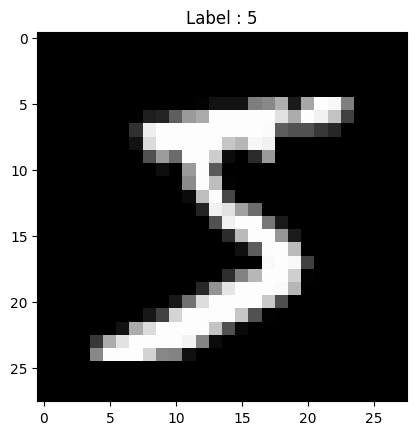

In [8]:
import matplotlib.pyplot as plt

plt.imshow(xtrain[0], cmap="gray")
plt.title(f"Label : {ytrain[0]}")


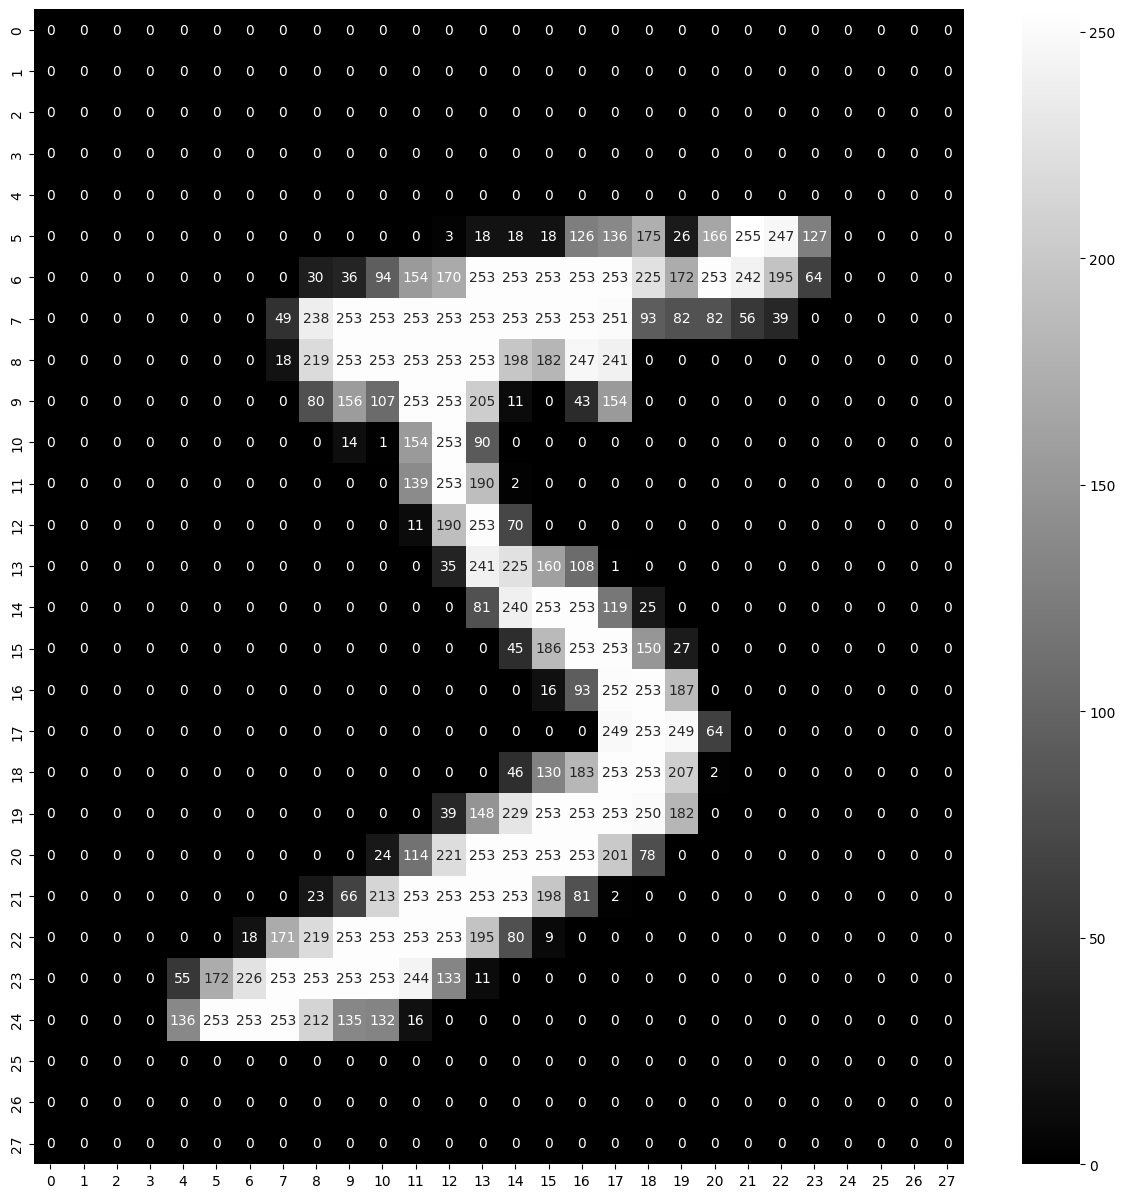

In [9]:
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.heatmap(xtrain[0], cmap="gray", annot=True, fmt="d")
plt.show()


In [14]:
random_idx = np.random.randint(0,  xtrain.shape[1], size=9)
list(enumerate(random_idx))


[(0, np.int64(9)),
 (1, np.int64(17)),
 (2, np.int64(10)),
 (3, np.int64(1)),
 (4, np.int64(17)),
 (5, np.int64(4)),
 (6, np.int64(10)),
 (7, np.int64(23)),
 (8, np.int64(19))]

In [13]:
import numpy as np

def show_random_imgs():
  random_idx = np.random.randint(0,  xtrain.shape[1], size=9)
  plt.figure(figsize=(10, 10))
  for idx, value in enumerate(random_idx):
    plt.subplot(3, 3, idx+1)
    plt.imshow(xtrain[value], cmap="gray")
    plt.title(f"Label : {ytrain[value]}")
    plt.axis("off")

  plt.show()


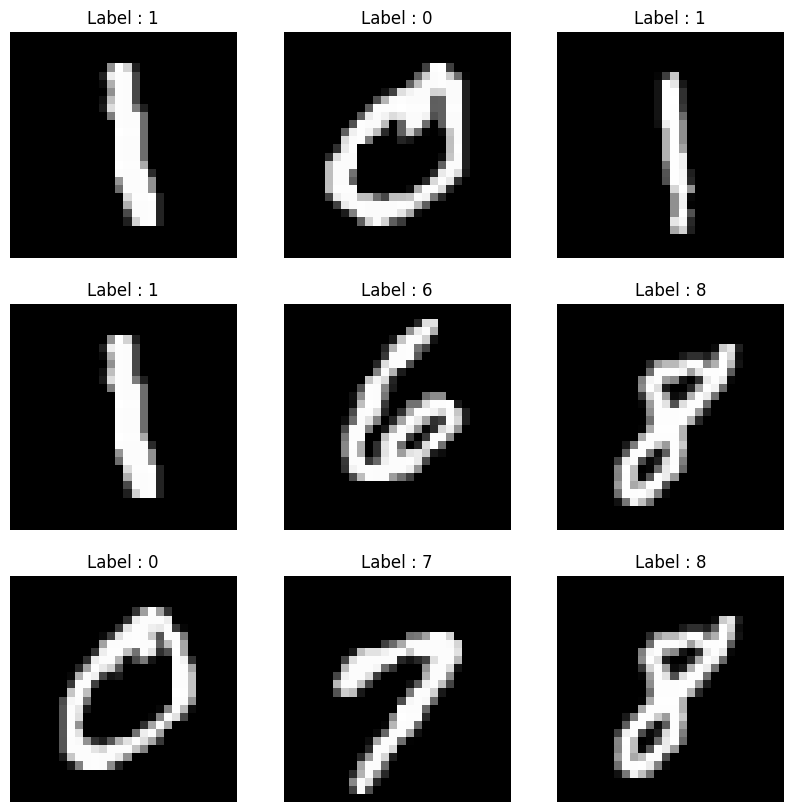

In [15]:
show_random_imgs()


In [16]:
np.unique(ytrain)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Preprocess the data
pixel range is between 0 - 255




In [17]:
xtrain_pre = xtrain.astype("float32") / 255.0
xtest_pre = xtest.astype("float32") / 255.0




In [18]:
xtrain_pre[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
xtrain_pre = np.expand_dims(xtrain_pre, -1)
xtest_pre = np.expand_dims(xtest_pre, -1)


In [20]:
xtrain_pre.shape


(60000, 28, 28, 1)

In [21]:
xtest_pre.shape


(10000, 28, 28, 1)

# Preprocess ytrain, ytest with onehot encoding
For multiclass classification you require onehotencoding




In [22]:
from keras.utils import to_categorical
ytrain_pre = to_categorical(ytrain)
ytrain_pre[0:5]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [23]:
ytrain[0:5]


array([5, 0, 4, 1, 9], dtype=uint8)

In [24]:
ytrain[0:5]


array([5, 0, 4, 1, 9], dtype=uint8)

In [25]:
np.unique(ytrain)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [26]:
ytest_pre = to_categorical(ytest)
ytest_pre[0:5]


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [27]:
ytest[0:5]


array([7, 2, 1, 0, 4], dtype=uint8)

# Build the convolutional neural network


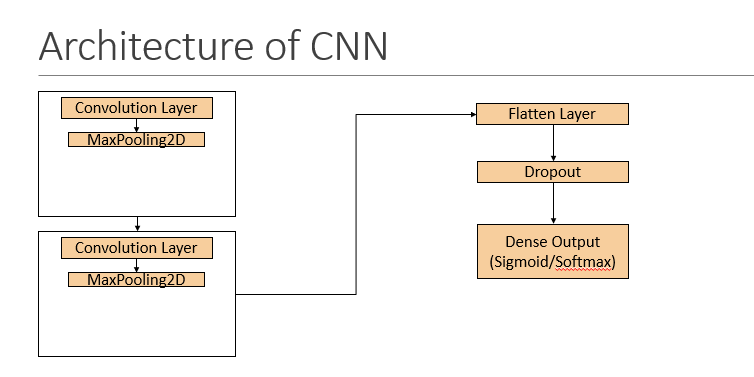

In [28]:
ytrain_pre.shape[1]


10

In [29]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Convolution2D, MaxPool2D, Flatten


In [30]:
model = Sequential(
    layers = [
        Input(shape=(28, 28, 1)),
        Convolution2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPool2D(pool_size=(2, 2)),
        Convolution2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPool2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(ytrain_pre.shape[1], activation="softmax")
    ]
)


In [31]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [33]:
hist = model.fit(
    xtrain_pre, ytrain_pre, epochs=15, validation_split=0.1, batch_size=128
)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7577 - loss: 0.7737 - val_accuracy: 0.9787 - val_loss: 0.0796
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9604 - loss: 0.1259 - val_accuracy: 0.9853 - val_loss: 0.0558
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9738 - loss: 0.0852 - val_accuracy: 0.9887 - val_loss: 0.0439
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9777 - loss: 0.0700 - val_accuracy: 0.9898 - val_loss: 0.0407
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9804 - loss: 0.0621 - val_accuracy: 0.9898 - val_loss: 0.0362
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9830 - loss: 0.0536 - val_accuracy: 0.9905 - val_loss: 0.0353
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9839 - loss: 0.0518 - val_accuracy: 0.9903 - val_loss: 0.0357
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9852 - loss: 0.0463 - val_accuracy: 0

# Plot the learning curve


In [34]:
model.evaluate(xtrain_pre, ytrain_pre)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9957 - loss: 0.0141


[0.015778975561261177, 0.995283305644989]

In [36]:
model.evaluate(xtest_pre, ytest_pre)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9900 - loss: 0.0292


[0.023994894698262215, 0.9918000102043152]

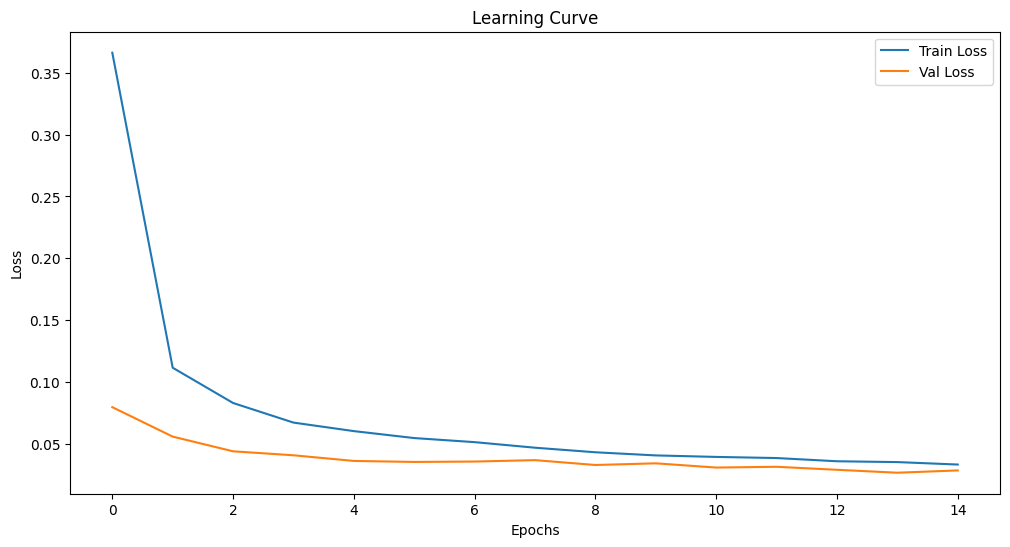

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label = "Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()


# Evaluate model in detail


In [38]:
yprob_test = model.predict(xtest_pre)
yprob_test[0:5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[4.0654329e-09, 2.3757935e-11, 3.3898405e-06, 5.0514228e-07,
        1.8573963e-13, 3.8548300e-11, 1.8794232e-17, 9.9999595e-01,
        1.9446389e-09, 1.4879922e-07],
       [2.4731141e-06, 6.2245158e-06, 9.9998653e-01, 1.8276973e-09,
        9.6832466e-11, 1.6123536e-12, 3.0976878e-06, 1.1978824e-11,
        1.6923530e-06, 1.0687050e-12],
       [1.4728708e-08, 9.9988079e-01, 7.6703435e-07, 1.6747499e-08,
        9.7561162e-05, 4.8601841e-08, 6.8515834e-07, 1.2256912e-05,
        7.9418041e-06, 1.9397337e-08],
       [9.9983358e-01, 1.8390755e-13, 2.7358401e-06, 8.5437080e-10,
        3.4721999e-08, 1.0650345e-07, 1.6247793e-04, 6.1742980e-09,
        6.9719988e-07, 3.8919390e-07],
       [1.2655826e-11, 5.7367136e-12, 2.2775362e-09, 6.2848962e-12,
        9.9999964e-01, 7.3820176e-13, 2.7380609e-10, 3.1423915e-09,
        2.5171865e-10, 3.9306988e-07]], dtype=float32)

In [39]:
import numpy as np
ypred_test = np.argmax(yprob_test, axis=1)
ypred_test[0:5]


array([7, 2, 1, 0, 4])

In [40]:
ytest[0:5]


array([7, 2, 1, 0, 4], dtype=uint8)

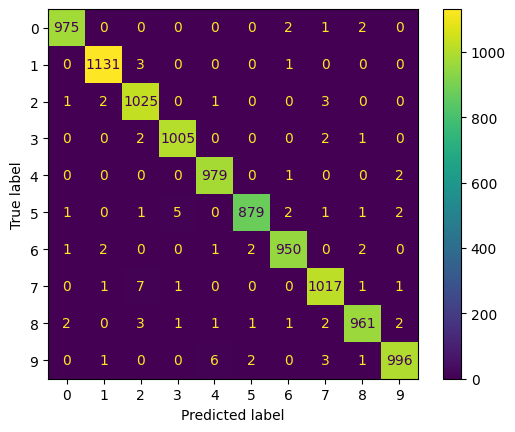

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)


In [42]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## above model is good as it has very less missclassifications and f1_macro > 0.8
Out of sample prediction


In [44]:
import cv2

img1 = cv2.imread("/content/img_4.jpg", cv2.IMREAD_GRAYSCALE)
img1


array([[  0,   0,   2,   0,   1,   0,   1,   0,   0,   4,   1,   2,   0,
          0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   4,   0,   3,   1,   0,   0,   4,   0,   0,   2,
          1,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   3,   0,   5,   0,   0,   2,   4,   2,   5,   2,   0,
          0,   1,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   5,   3,   0,   0,  79, 190,  97,   0,   0,   1,   2,
          0,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   2,   0, 227, 250, 246,   8,   0,   3,   0,
          1,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  2,   1,   1,   1,   0,   0, 255, 255, 255,   0,   1,   3,   2,
          2,   0,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  4,   0,   6,   2,   0,   6, 250, 255, 255,   5,   4,   0,   0,
          4,   0,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   3,   0,   0,   5,  70, 255, 255, 254,   1,   0,   8,   0,
          2,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   2,   2,   1,   0, 236, 254, 254, 252,   0,   0,   0,   3,
          0,   3,   0,   1,   0,   3,   0,   4,   3,   0,   1,   0,   0,
          0,   0],
       [  2,   4,   0,   4,   0, 249, 255, 255, 157,   0,   0,   3,   0,
         76, 185,  98,   0,   0,   4,   1,   1,   0,   1,   1,   0,   0,
          0,   0],
       [  2,   3,   0,   3,   0, 255, 255, 255,   0,   1,   0,   0,   4,
        230, 255, 245,   0,   5,   0,   0,   3,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   2,   0,   0, 254, 254, 254,   4,   2,   0,   5,   0,
        255, 255, 253,   3,   0,   1,   7,   1,   3,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   4,   1,   0, 255, 254, 255,   0,   1,   0,   2,   6,
        255, 253, 255,   0,   1,   0,   1,   0,   1,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   2,   0, 255, 255, 255,   1,  99, 224, 249, 251,
        255, 250, 254, 252, 255, 255, 254, 224,  94,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0, 255, 255, 255, 255, 255, 252, 255, 254,
        252, 255, 255, 255, 254, 252, 254, 252, 245,   1,   1,   0,   0,
          0,   0],
       [  0,   0,   4,   0,   2, 247, 255, 255, 254, 248, 254, 255, 255,
        255, 255, 252, 255, 255, 254, 255, 255, 151,   0,   2,   0,   0,
          0,   0],
       [  1,   0,   2,   0,   1, 118, 255, 251, 254, 255, 167,   6,   2,
        255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   4,   0,   2,   2,   0,   4,   2,   3,   0,   0,   5,  70,
        255, 252, 251,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   1,   0,   0,   1,   0,   0,   0,   0,   1,   1, 230,
        255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   4,   0,   0,   2,   1,   6,   0,   5,   0,   0, 251,
        255, 248, 148,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   0,   0,   4,   0,   0,   1,   6,   0,   1,   0, 255,
        251, 255,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  2,   1,   0,   2,   0,   1,   9,   0,   0,   5,   1,   0, 255,
        255, 254,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   2,   0,   1,   3,   0,   0,   4,   3,   0,   0,   5, 244,
        251, 255,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   1,   3,   0,   0,   0,   3,   0,   1, 127,
        252, 147,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

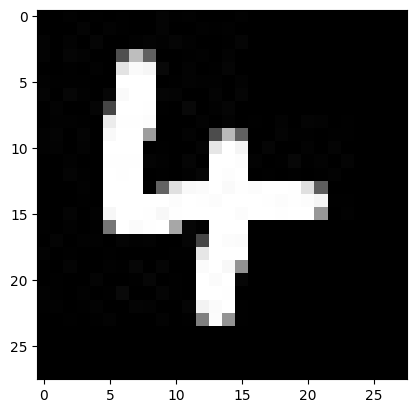

In [45]:
import matplotlib.pyplot as plt

plt.imshow(img1, cmap="gray")


In [46]:
def predict_number(path: str):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap="gray")
  plt.show()
  img_pre = img.astype("float32") / 255
  img_pre = img_pre.reshape(1, 28, 28, 1)
  yprob = model.predict(img_pre)
  ypred = np.argmax(yprob, axis=1)
  max_prob = np.max(yprob, axis=1)
  print(f"Predicted number is {ypred[0]}")
  print(f"Probability : {max_prob}")


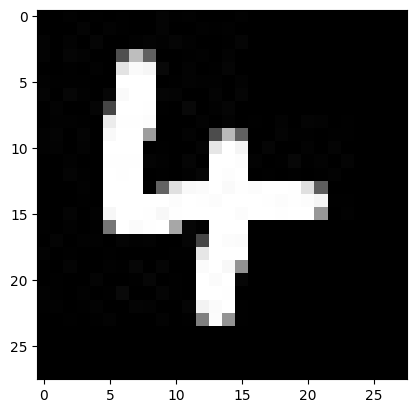

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
Predicted number is 4
Probability : [0.9999789]


In [47]:
predict_number(path="/content/img_4.jpg")


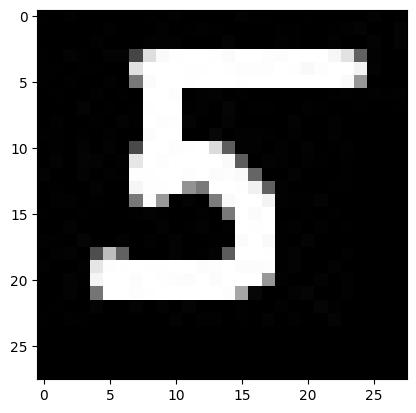

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted number is 5
Probability : [0.9999999]


In [48]:
predict_number(path="/content/img_5.jpg")


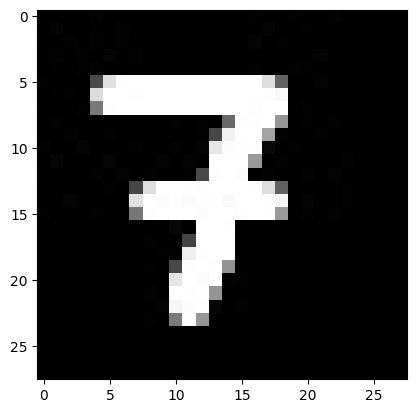

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted number is 7
Probability : [0.9983644]


In [49]:
predict_number(path="/content/img_7.jpg")


# Save the model object


In [50]:
model.save("digit_model.keras")


In [51]:
from keras.models import load_model
m = load_model("/content/digit_model.keras")
m.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)